## AppDev Summative 2020 - Machine Learning Notebook

#### Load Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
import json


## Solar Farm

#### Import Historical Data

In [2]:
solar_data = pd.read_csv('solar_generation_data.csv')

In [3]:
solar_data.sample(10)

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
100,Apr,11,93°,73°,22.6,7,0.0,7.48
175,Jun,25,77°,47°,17.4,5,0.0,5.76
217,Aug,6,80°,59°,19.6,6,0.0,6.49
332,Nov,29,103°,69°,26.6,8,NaN,8.81
218,Aug,7,83°,53°,19.2,6,0.0,6.36
289,Oct,17,103°,80°,26.5,8,0.0,8.77
232,Aug,21,77°,50°,21.0,7,0.0,6.95
294,Oct,22,95°,70°,24.9,8,0.0,8.25
200,Jul,20,81°,52°,18.4,6,0.0,6.09
251,Sep,9,81°,54°,23.0,7,0.0,7.62


In [4]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   365 non-null    object 
 1   Day                     365 non-null    int64  
 2   Temp Hi                 365 non-null    object 
 3   Temp Low                365 non-null    object 
 4   Solar                   365 non-null    float64
 5   Cloud Cover Percentage  365 non-null    int64  
 6   Rainfall in mm          312 non-null    float64
 7   Power Generated in MW   365 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 22.9+ KB


In [5]:
solar_data.isnull().sum() #53 Null Values for Rainfall in mm

Month                      0
Day                        0
Temp Hi                    0
Temp Low                   0
Solar                      0
Cloud Cover Percentage     0
Rainfall in mm            53
Power Generated in MW      0
dtype: int64

In [6]:
solar_data.describe()

,Day,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
count,365.000000,365.000000,365.000000,312.000000,365.000000
mean,15.720548,22.615068,6.972603,2.737179,7.488192
std,8.808321,5.311600,1.699811,16.472178,1.759069
min,1.000000,1.500000,1.000000,0.000000,0.500000
25%,8.000000,18.500000,6.000000,0.000000,6.130000
50%,16.000000,22.800000,7.000000,0.000000,7.550000
75%,23.000000,27.000000,9.000000,0.000000,8.940000
max,31.000000,30.200000,9.000000,161.500000,10.000000


At a quick glance at descriptive statistics, it appears we do not have any outliers.

<AxesSubplot:title={'center':'Figure 1 - Missing Data Location'}>

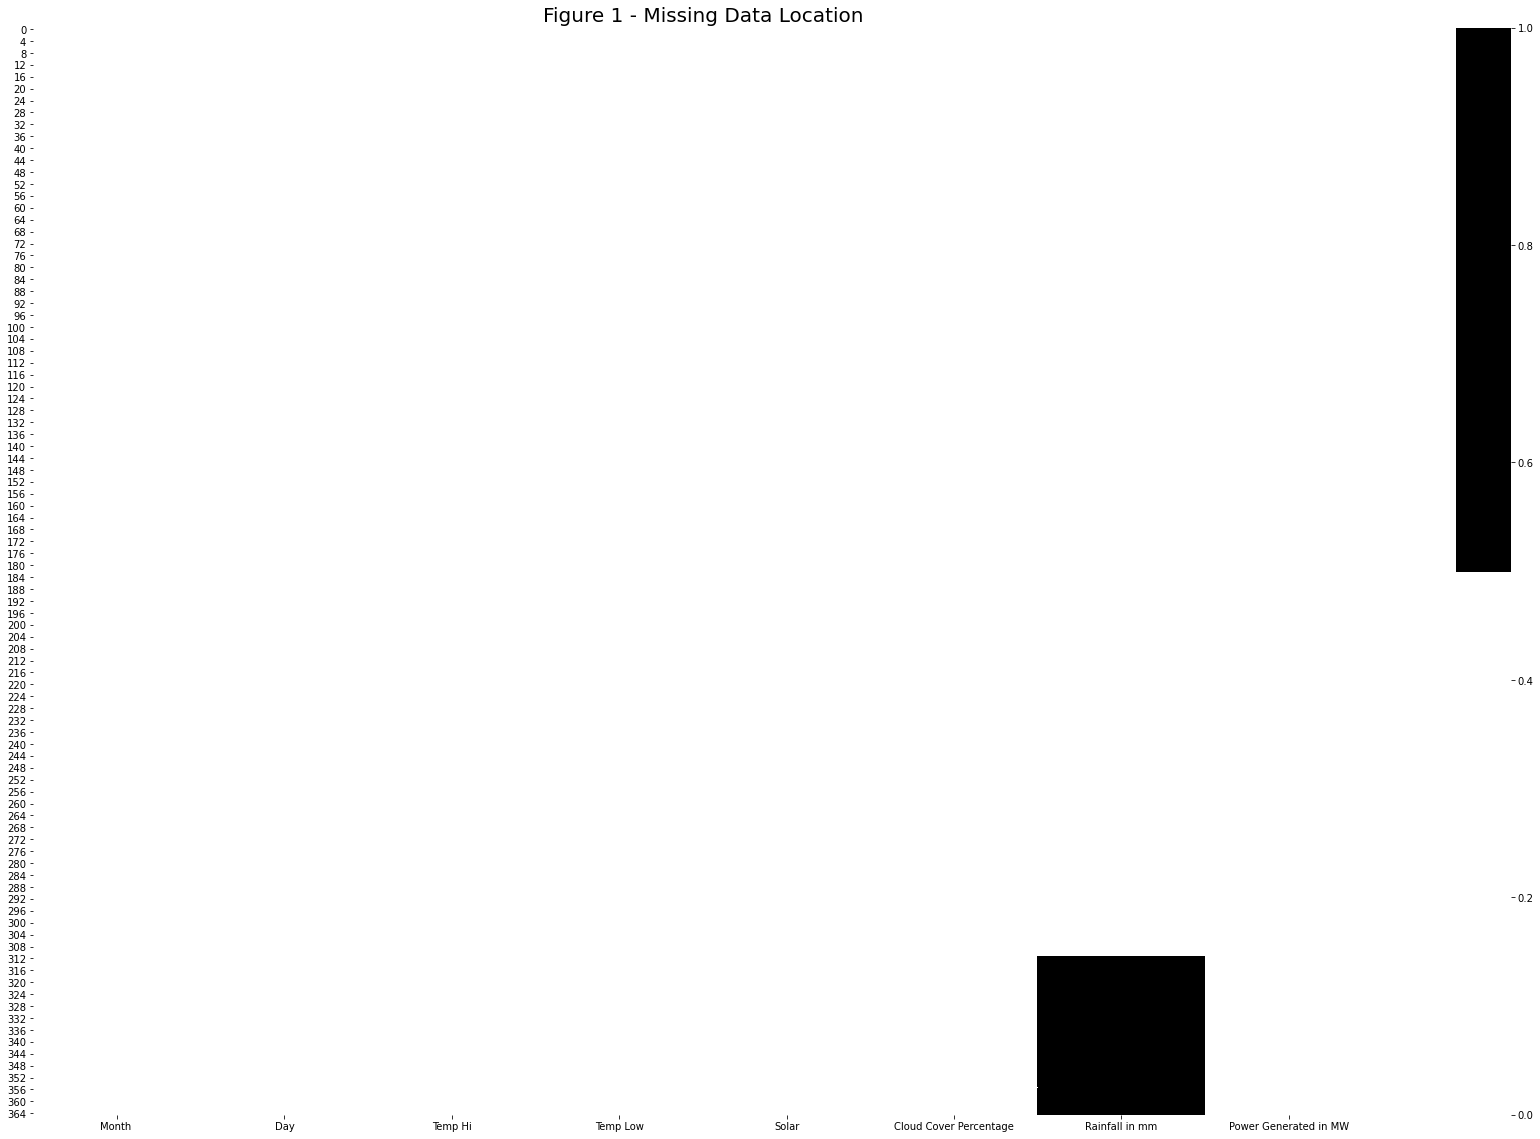

In [7]:
plt.figure(figsize=(30,20))
plt.title('Figure 1 - Missing Data Location', fontsize = 20)
colours = ['white', 'black'] # - black represents Null data.
sns.heatmap(solar_data.isnull(), cmap=sns.color_palette(colours))

From the missing data location, we see Rainfall in mm missing values are all towards the end of the year. 

Because of this reason, we decide to drop all missing values since the number of missing values isn't too significant, and I don;t want to skew the dataset by imputing missing values.

In [8]:
solar_data.dropna(inplace=True)

In [9]:
solar_data.sample(10)

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
217,Aug,6,80°,59°,19.6,6,0.0,6.49
221,Aug,10,76°,47°,19.7,6,0.0,6.52
219,Aug,8,84°,52°,19.8,6,0.0,6.56
300,Oct,28,97°,78°,23.2,7,0.0,7.68
287,Oct,15,104°,70°,27.2,9,0.0,9.01
216,Aug,5,81°,61°,19.0,6,0.0,6.29
161,Jun,11,81°,59°,17.5,5,0.0,5.79
236,Aug,25,85°,54°,21.4,7,0.0,7.09
259,Sep,17,93°,55°,23.9,7,0.0,7.91
114,Apr,25,94°,70°,20.3,6,0.0,6.72


In [10]:
solar_data.drop(columns = ['Month ', 'Day'], inplace = True)

In [11]:
solar_data.columns

Index(['Temp Hi', 'Temp Low', 'Solar', 'Cloud Cover Percentage',
       'Rainfall in mm', 'Power Generated in MW'],
      dtype='object')

In [12]:
solar_data['Temp Hi'] = solar_data['Temp Hi'].replace('\u00b0','', regex=True)
solar_data['Temp Low'] = solar_data['Temp Low'].replace('\u00b0','', regex=True)

In [13]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temp Hi                 312 non-null    object 
 1   Temp Low                312 non-null    object 
 2   Solar                   312 non-null    float64
 3   Cloud Cover Percentage  312 non-null    int64  
 4   Rainfall in mm          312 non-null    float64
 5   Power Generated in MW   312 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 17.1+ KB


In [14]:
for i in range (0,3):
    solar_data.iloc[:,i] = solar_data.iloc[:,i].apply(pd.to_numeric, errors = 'coerce')

In [15]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temp Hi                 312 non-null    int64  
 1   Temp Low                312 non-null    int64  
 2   Solar                   312 non-null    float64
 3   Cloud Cover Percentage  312 non-null    int64  
 4   Rainfall in mm          312 non-null    float64
 5   Power Generated in MW   312 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 17.1 KB


Text(0.5, 1.0, 'Figure 2 - Correlation Heatmap Showing Strenth of Linear Relationship between Variables')

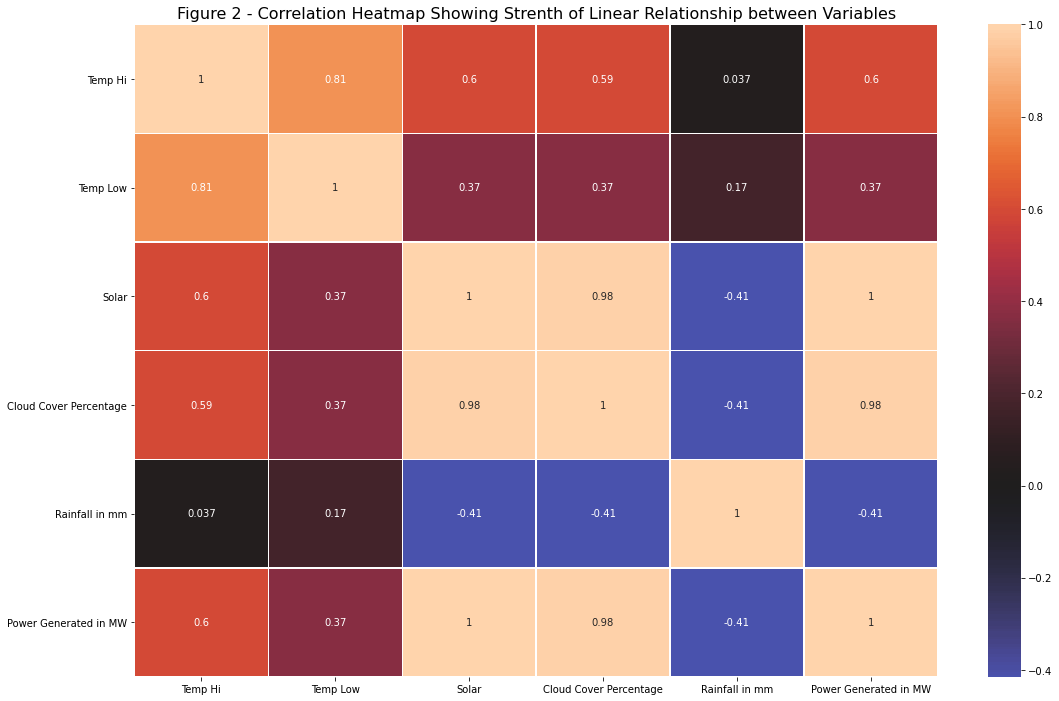

In [16]:
correlation = solar_data.corr()
plt.subplots(figsize=(18,12))
sns.heatmap(correlation, center=0, annot=True, linewidths=.3)
plt.title('Figure 2 - Correlation Heatmap Showing Strenth of Linear Relationship between Variables', 
          fontsize = 16)

Solar is essentially the same thing as power generated as they have a perfect correlation. 

Hence, we drop Solar.

In [17]:
# Values of target
y = solar_data['Power Generated in MW'].values #Target Variables

# Values of attributes
X_data = solar_data.drop(['Power Generated in MW', 'Solar'], axis=1) #We have now dropped solar.
X = X_data.values

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (218, 4)
Training Labels Shape: (218,)
Testing Features Shape: (94, 4)
Testing Labels Shape: (94,)


In [19]:
rf = RandomForestRegressor(n_estimators = 150, random_state = 42) #Using a Random Forest Regressor

In [20]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [21]:
predicted_labels = rf.predict(X_test)
score = r2_score(y_test, predicted_labels)
score

0.9584123827031119

In [22]:
kfold = KFold(n_splits=10)
results = cross_val_score(rf, X_train, y_train, cv=kfold)
print("Accuracy: ", results.mean())

Accuracy:  0.9570108176156802


##### Model Performance

We get an R2 score of 95.8%. Our model performs really well on test data.

The score is also maintained while running a KFold Cross Validation with 10 splits. 

Let's take a look at feature importance, and see which input variables hold the most importance.

In [23]:
result = pd.DataFrame()
result['feature'] = X_data.columns # column's names
result['importance'] = rf.feature_importances_ # values
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

,feature,importance
2,Cloud Cover Percentage,0.971436
0,Temp Hi,0.012870
1,Temp Low,0.011644
3,Rainfall in mm,0.004050


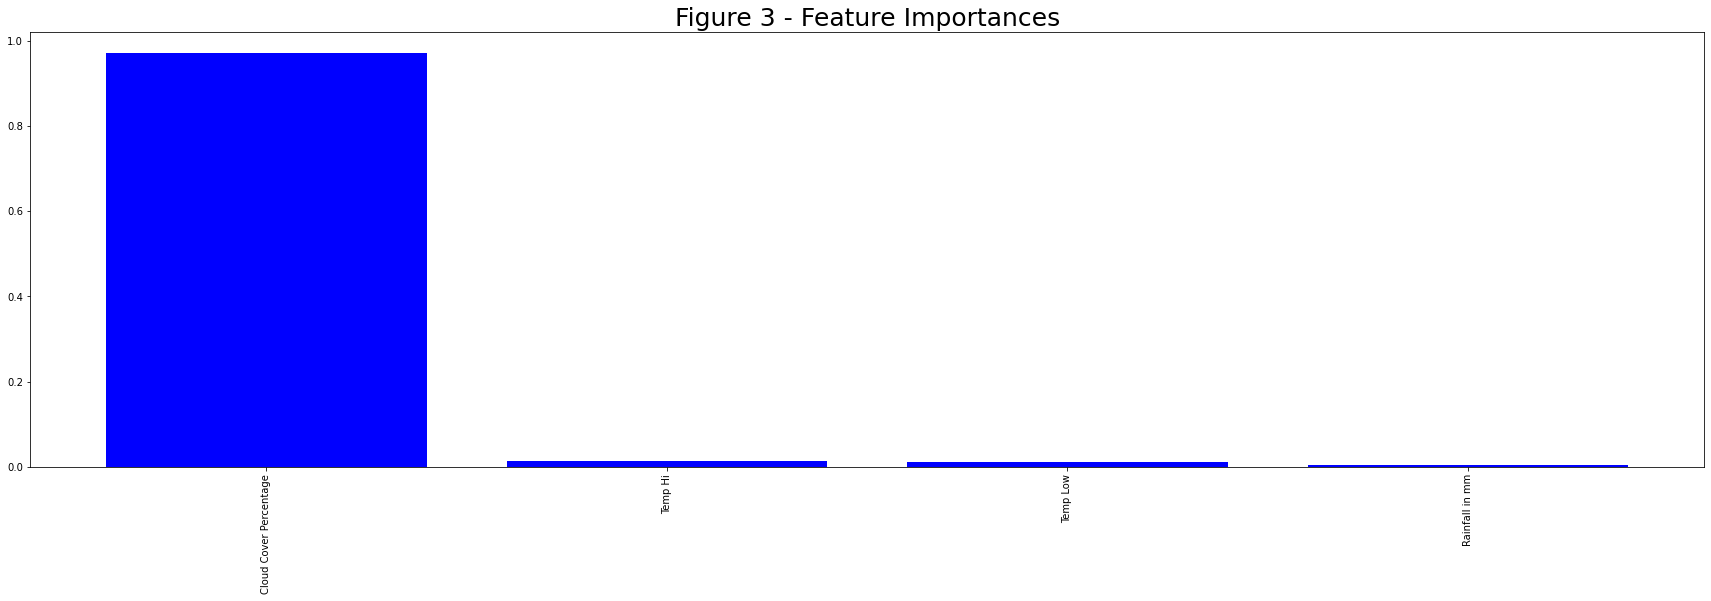

In [24]:
plt.figure(figsize = (30,8))
plt.title('Figure 3 - Feature Importances', fontsize = 25)
plt.bar(range(len(result['feature'])), result['importance'], color='blue', align='center')
plt.xticks(range(len(result['feature'])), result['feature'], rotation=90)
plt.show()

From Feature Importance Table and Figure above, we see that Three (3) variables contribute the most to our model. 

These three variables are "Cloud Cover Percentage", "Temp Hi" and "Temp Lo"

We shall therefore drop the Rainfall column, and proceeed to use the 3 Variables for our final model.

In [25]:
# Values of target
y = solar_data['Power Generated in MW'].values

# Values of attributes
X_data = solar_data.drop(['Power Generated in MW', 'Solar', 'Rainfall in mm'], axis=1)
X = X_data.values

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (218, 3)
Training Labels Shape: (218,)
Testing Features Shape: (94, 3)
Testing Labels Shape: (94,)


In [27]:
X_data.columns

Index(['Temp Hi', 'Temp Low', 'Cloud Cover Percentage'], dtype='object')

In [28]:
rf_solar = RandomForestRegressor(n_estimators = 150, random_state = 42)

In [29]:
rf_solar.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [30]:
predictions = rf_solar.predict(X_test)
score = r2_score(y_test, predictions)
score

0.9591425786639491

### Saving our Solar Prediction Model

In [31]:
pickle.dump(rf_solar, file = open("solar_model.pkl", "wb")) #Model saved as solar_model.pkl in the pwd

## Wind Farm

#### Import dataset

In [32]:
wind_data = pd.read_csv('wind_generation_data.csv')

In [33]:
wind_data.info() #No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wind speed    366 non-null    float64
 1   direction     366 non-null    int64  
 2   Power Output  366 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.7 KB


In [34]:
wind_data.describe() #No Apparent outliers

,wind speed,direction,Power Output
count,366.000000,366.000000,366.000000
mean,15.695792,220.081967,37.193607
std,3.743556,4.462796,7.243363
min,7.450000,209.000000,23.170000
25%,13.000000,218.000000,31.352500
50%,15.530000,220.000000,37.525000
75%,18.802500,222.000000,42.925000
max,22.710000,234.000000,51.810000


Text(0.5, 1.0, 'Figure 4 - Correlation Heatmap Showing Strenth of Linear Relationship between Variables')

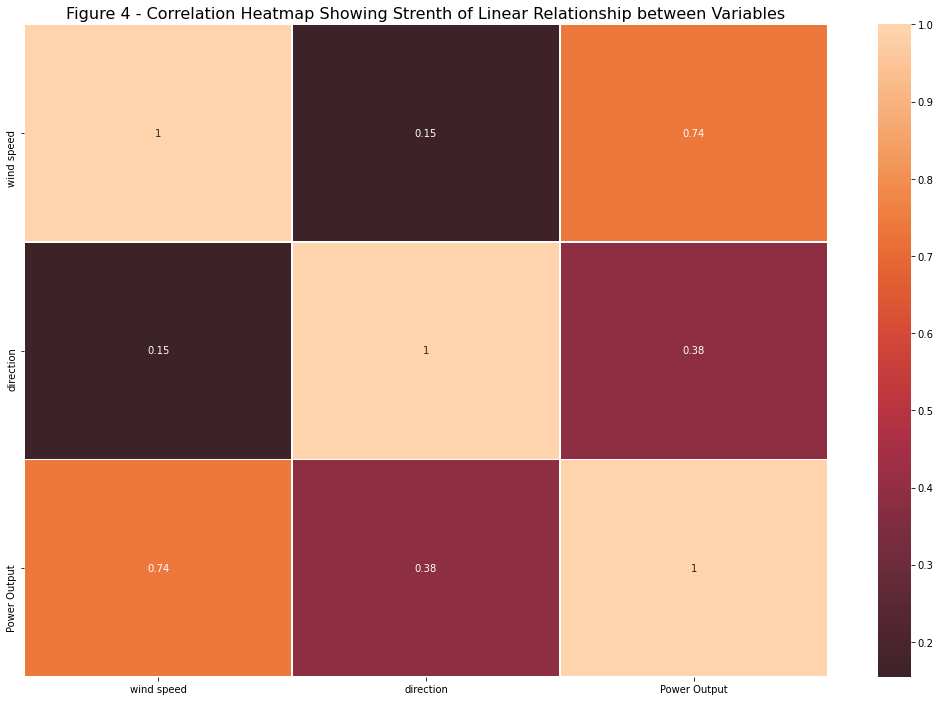

In [35]:
correl = wind_data.corr()
plt.subplots(figsize=(18,12))
sns.heatmap(correl, center=0, annot=True, linewidths=.3)
plt.title('Figure 4 - Correlation Heatmap Showing Strenth of Linear Relationship between Variables', 
          fontsize = 16)

In [36]:
wind_data.columns

Index(['wind speed', 'direction', 'Power Output'], dtype='object')

In [37]:
# Values of target
y_1 = wind_data['Power Output'].values

# Values of attributes
X_1data = wind_data.drop(['Power Output'], axis=1)
X_1 = X_1data.values

# Splitting
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [38]:
print('Training Features Shape:', X_1train.shape)
print('Training Labels Shape:', y_1train.shape)
print('Testing Features Shape:', X_1test.shape)
print('Testing Labels Shape:', y_1test.shape)

Training Features Shape: (256, 2)
Training Labels Shape: (256,)
Testing Features Shape: (110, 2)
Testing Labels Shape: (110,)


In [39]:
rf_wind = RandomForestRegressor(n_estimators = 150)

In [40]:
rf_wind.fit(X_1train, y_1train)

RandomForestRegressor(n_estimators=150)

In [41]:
prediction = rf_wind.predict(X_1test)
score = r2_score(y_1test, prediction)
score

0.723859708849248

### Model Performance

Our Random Forest Regressor does not perform too well here. However, for the purpose of this exercise, we shall forge on with this model.

Let us take a look at the feature importance of the input variables.

In [42]:
result_1 = pd.DataFrame()
result_1['feature'] = X_1data.columns # column's names
result_1['importance'] = rf_wind.feature_importances_ # values
result_1.sort_values(by=['importance'], ascending=False, inplace=True)
result_1

,feature,importance
0,wind speed,0.76638
1,direction,0.23362


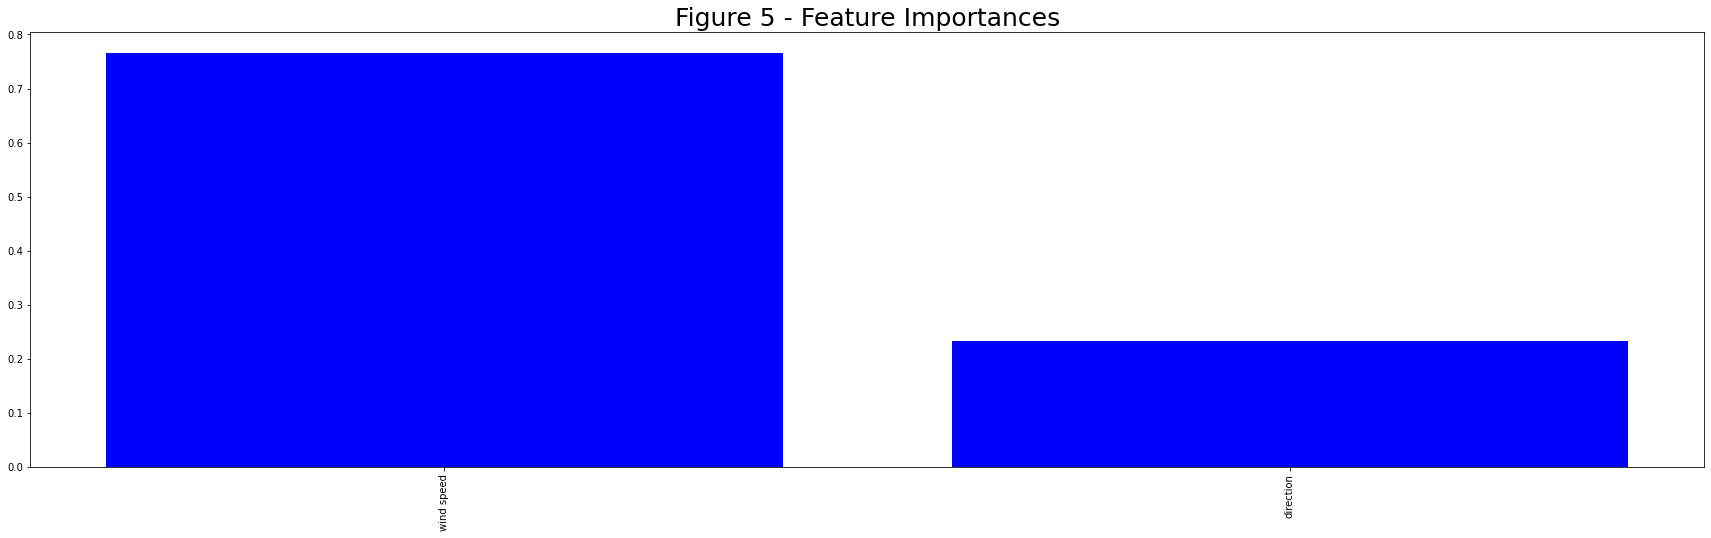

In [43]:
plt.figure(figsize = (30,8))
plt.title('Figure 5 - Feature Importances', fontsize = 25)
plt.bar(range(len(result_1['feature'])), result_1['importance'], color='blue', align='center')
plt.xticks(range(len(result_1['feature'])), result_1['feature'], rotation=90)
plt.show()

From the Feature Importance table and figure above, we see that the 2 input variables are key towards predicting the putput variable, albeit, the wind_speed gives a better indication of Power Output compared to wind direction.

### Saving our model

In [44]:
pickle.dump(rf_wind, file = open("wind_model.pkl", "wb"))

# End of Notebook